# *Modeling Part: Logistic Regression*

****************************************************************************************************************************************

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
url_final = 'https://dl.dropboxusercontent.com/scl/fi/ep8vuirz46gkhw4a3yfw6/final_dataset.csv?rlkey=b9ji5utoaahhkmsoebup6q95q&dl=1'
df_final = pd.read_csv(url_final)

In [3]:
df_final.shape

(284700, 25)

In [4]:
df_final.head()

,COIL,MT_ADJUSTED,DATE,TIME_START_PROCESS,TEMP_Z1,PYRO_2_FRST_3_ZONE,SPEED_PROCESS,FILL_TIRO,LASER_FRN_1,ELET_FE2,...,LASER_FRN_9,DEC_FE2,DEC_FE3,LASER_FRN_8,SPZ1_R1_ASS,FRN_FURNACE_PRESSURE,AIR_CH4_1,FILL_FORZA,PRES_ZONA3_MEASURED,Has_Defect
0,297712,0.0,2019-03-03,16:00:17.140,-0.626250,0.589075,-1.749652,-0.003943,1.130454,-0.024409,...,-0.921559,-0.019089,0.006705,-3.281993,-0.005561,3.480863,5.618876,-0.006274,-0.362265,0.0
1,297712,7.0,2019-03-03,16:01:02.140,-0.548642,0.310833,-1.423870,-0.003943,1.167358,-0.024409,...,-0.882066,-0.019089,0.006705,-3.286931,-0.005561,4.155847,5.606975,-0.006274,-3.121354,0.0
2,297712,14.0,2019-03-03,16:01:32.140,-0.489710,0.219359,-1.249998,-0.003943,1.169191,-0.024409,...,-0.895256,-0.019089,0.006705,-3.283506,-0.005561,3.724010,5.505825,-0.006274,-2.903597,0.0
3,297712,21.0,2019-03-03,16:01:47.080,-0.472777,0.560960,-1.250524,-2.503042,1.183099,-0.024409,...,-0.888345,-0.019089,0.006705,-3.239610,-0.005561,3.202527,5.599273,-1.168397,-2.357400,0.0
4,297712,28.0,2019-03-03,16:02:17.080,-0.457463,0.437551,-1.250053,-2.717672,1.189643,-2.331214,...,-0.887054,-2.294722,1.560311,-3.249343,-0.574788,2.952983,5.556279,-1.176393,-1.833425,0.0


**'df_final'** is now our final dataframe with the selected features and the target column of interest ('Has_Defect') at the end

#### Splitting our data into Train, Validation and Test sets

To ensure that the same coils are not split across both the training and testing sets, thereby preventing data leakage, we need to stratify the split based on the coil ID. This means we should split our dataset in such a way that all records belonging to a specific coil are either entirely in the training set or entirely in the testing set

In [5]:
# Get unique coil IDs and split them
unique_coils = df_final['COIL'].unique()
train_coils, test_coils = train_test_split(unique_coils, test_size=0.2, random_state=42)
train_coils, val_coils = train_test_split(train_coils, test_size=0.25, random_state=42)  # Splitting the remaining 80% into 60% train and 20% validation

# Split the DataFrame into training, validation, and testing sets based on coil IDs
train_df = df_final[df_final['COIL'].isin(train_coils)]
val_df = df_final[df_final['COIL'].isin(val_coils)]
test_df = df_final[df_final['COIL'].isin(test_coils)]


In [6]:
target = "Has_Defect"

# Prepare the data
X_train = train_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', target], axis=1)  
y_train = train_df[target]    

X_val = val_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', target], axis=1)
y_val = val_df[target]

X_test = test_df.drop(['COIL', 'MT_ADJUSTED', 'DATE', 'TIME_START_PROCESS', target], axis=1)   
y_test = test_df[target]     

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_log_reg = log_reg.predict(X_val)

# Calculate and print the accuracy of the model on the validation set
accuracy_val_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
print("Accuracy of Logistic Regression on the validation set:", accuracy_val_log_reg)

# Make predictions on the test set
y_test_pred_log_reg = log_reg.predict(X_test)

# Calculate and print the accuracy of the model on the test set
accuracy_test_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
print("\nAccuracy of Logistic Regression on the test set:", accuracy_test_log_reg)

Accuracy of Logistic Regression on the validation set: 0.7355814033755566

Accuracy of Logistic Regression on the test set: 0.6976437748149176


In [24]:
# Print out the classification report 
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_log_reg))

# Create a confusion matrix to visualize the performance of the model
cm_log_reg = metrics.confusion_matrix(y_test, y_test_pred_log_reg)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.76      0.78     39859
         1.0       0.51      0.55      0.53     17818

    accuracy                           0.70     57677
   macro avg       0.65      0.66      0.65     57677
weighted avg       0.70      0.70      0.70     57677



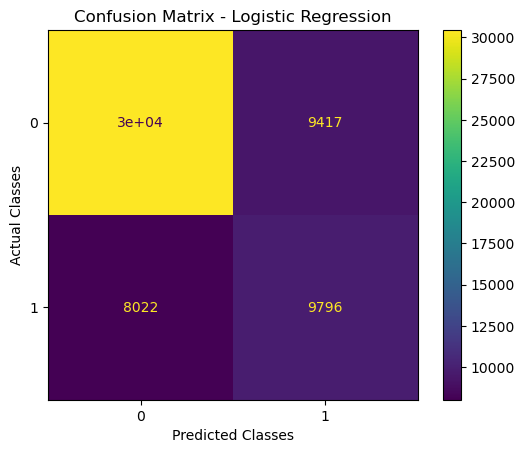

In [25]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


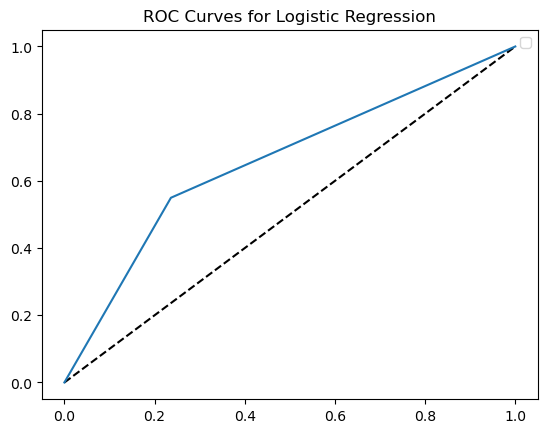

In [26]:
# Plot the ROC curve for Logistic Regression
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_test_pred_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log)
plt.title('ROC Curves for Logistic Regression')
plt.legend()
plt.show()

In [23]:
# Model's coefficients
coefs_log_reg = log_reg.coef_[0]

# Create an empty DataFrame
df = pd.DataFrame()

# Populate the DataFrame with feature names and corresponding coefficients
df['Feature'] = X_train.columns
df['Coefficient'] = coefs_log_reg

# Display the DataFrame
df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
0,TEMP_Z1,0.880644
3,FILL_TIRO,0.732366
2,SPEED_PROCESS,0.342274
6,DEC_H2SO4,0.215894
19,PRES_ZONA3_MEASURED,0.200698
11,LASER_FRN_9,0.155836
4,LASER_FRN_1,0.111960
13,DEC_FE3,0.102671
8,EXT_1,0.089346
18,FILL_FORZA,0.082466


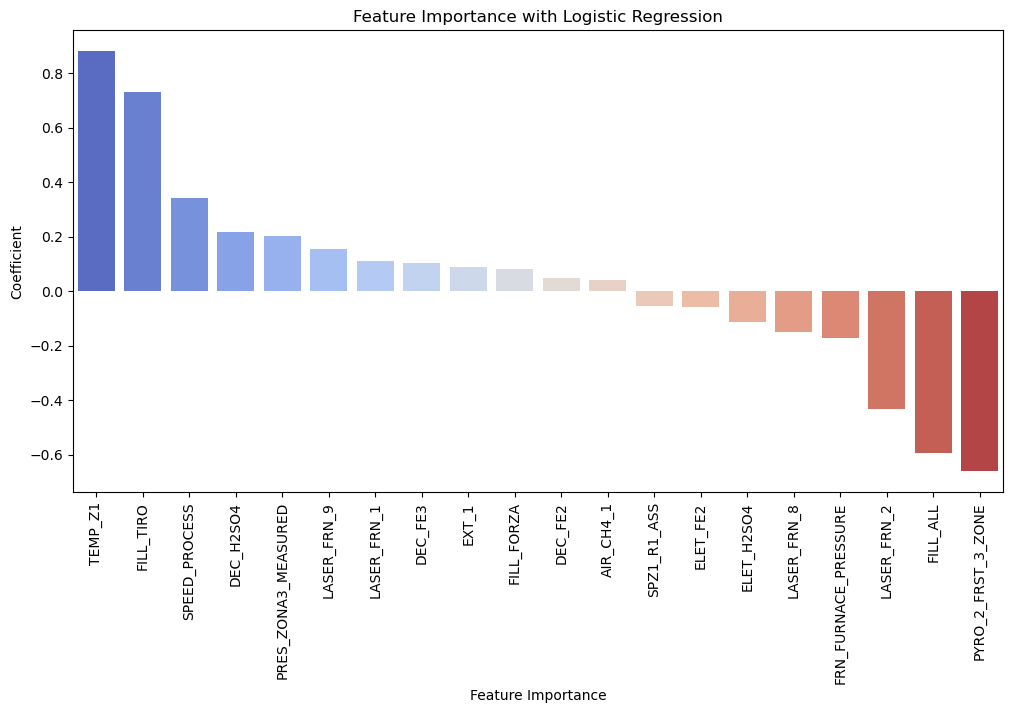

In [21]:
# Plot the coefficient values in a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=df.sort_values(by='Coefficient', ascending=False), palette='coolwarm')
plt.xlabel('Feature Importance')
plt.title('Feature Importance with Logistic Regression')
plt.xticks(rotation=90)
plt.show()

Positive vs. Negative Influence:
- Features with bars extending to the left (positive coefficients) increase the log odds of the predicted outcome (e.g., the probability of a metal coil being defective), meaning they have a positive relationship with the likelihood of the outcome.
- Conversely, features with bars extending to the right (negative coefficients) decrease the log odds of the predicted outcome, indicating a negative relationship.

Predictive Power:
- A feature with a high positive coefficient increases the probability of a coil being classified as defective when the feature value increases.
- A feature with a high negative coefficient decreases the probability of a coil being classified as defective when the feature value increases.

Decision-Making:
- In the context of a manufacturing process, features with large positive coefficients may be areas to investigate for potential quality improvements.
- Features with large negative coefficients may indicate factors that when increased, improve the quality or reduce the likelihood of defects.